In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycanon import anonymity as pyc
%matplotlib inline

In [24]:
df = pd.read_json('input\\News_Category_Dataset_v3.json',lines=True)
#df[pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')<"2018-06-01"].head(10)
beforeMay2018 = df[pd.to_datetime(df["date"]).dt.strftime('%Y-%m-%d')<="2019-01-31"] # 2018-05-26
#beforeMay2018v2 = df[df["date"]<"2018-06-01"]
#print(beforeMay2018v2 == beforeMay2018)

required_columns = ["BLACK VOICES",
                    "COMEDY",
                    "CRIME",
                    "DIVORCE",
                    "GREEN",
                    "HOME & LIVING",
                    "IMPACT",
                    "MEDIA",
                    "PARENTS",
                    "RELIGION",
                    "SPORTS",
                    "STYLE",
                    "THE WORLDPOST",
                    "WEDDINGS",
                    "WEIRD NEWS",
                    "WOMEN",
                    "WORLD NEWS",
                    "WORLDPOST"]
df = df[df["date"] < "2018-05-26"]
df = df[df["category"].isin(required_columns)]
print(df)

#required_categories = df[]


                                                     link  \
8697    https://www.huffingtonpost.com/entry/north-kor...   
8698    https://www.huffingtonpost.com/entry/mississau...   
8699    https://www.huffingtonpost.com/entry/irish-tra...   
8700    https://www.huffingtonpost.com/entry/ireland-a...   
8701    https://www.huffingtonpost.com/entry/warriors-...   
...                                                   ...   
209501  https://www.huffingtonpost.com/entry/tom-brady...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline      category  \
8697    North Korea Still Open To Talks After Trump Ca...    WORLD NEWS   
8698    2 Men Detonate Bomb Inside Indian Restaurant N...    WORLD NEWS   
8699    Thousands Travel Home To Ireland T

In [25]:
beforeMay2018.head(50)
# df= beforeMay2018
#df =
print(df.count())

link                 61500
headline             61500
category             61500
short_description    61500
authors              61500
date                 61500
dtype: int64


### Matching Dataset to Kamboj and Chongtham

In [26]:
#df['category'].value_counts().to_csv('counts2.csv')

df['category'].value_counts()

category
COMEDY           5175
SPORTS           4884
BLACK VOICES     4528
HOME & LIVING    4195
PARENTS          3955
THE WORLDPOST    3664
WEDDINGS         3651
WOMEN            3490
IMPACT           3458
DIVORCE          3426
CRIME            3404
MEDIA            2815
WEIRD NEWS       2668
GREEN            2622
WORLDPOST        2579
RELIGION         2556
STYLE            2254
WORLD NEWS       2176
Name: count, dtype: int64

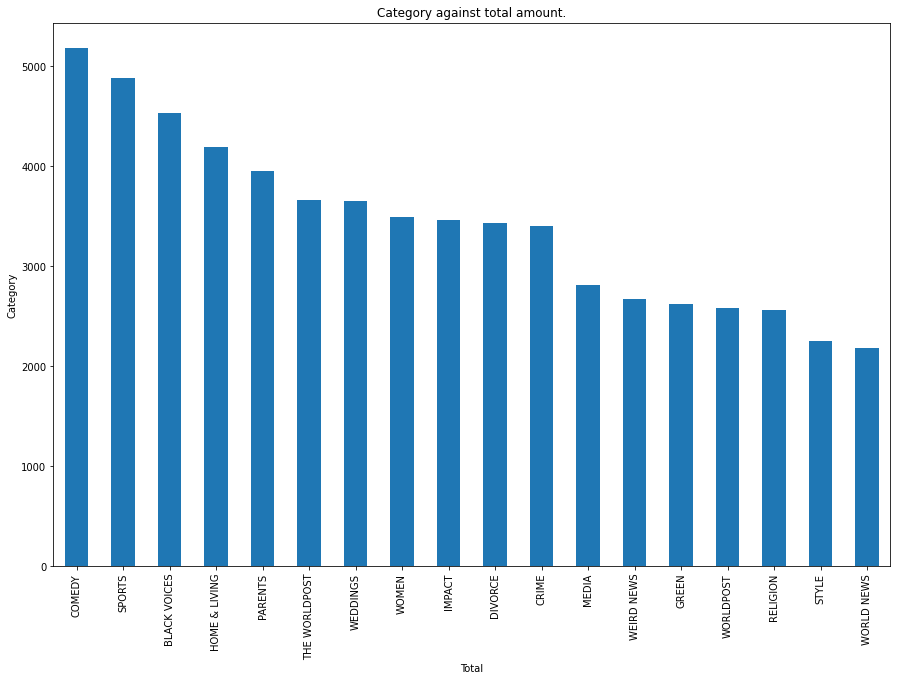

In [27]:
df['category'].value_counts().plot(kind='bar', figsize=(15,10))

plt.xlabel("Total")
plt.ylabel("Category")
plt.title('Category against total amount.', size=12)
plt.show()

In [28]:
#from https://www.kaggle.com/code/dima806/news-category-classification-distilbert

item0 = df.shape[0]  # Store the initial number of items in the DataFrame
df = df.drop_duplicates()  # Remove duplicate rows from the DataFrame
item1 = df.shape[0]  # Store the number of items in the DataFrame after removing duplicates
print(f"There are {item0-item1} duplicates found in the dataset")  # Print the number of duplicates removed

df = df.rename(columns={'category': 'label'})  # Rename the 'category' column to 'label'

df['title'] = df['headline'] + '\n\n\n' + df['short_description']  # Create a new 'title' column by combining 'headline' and 'short_description'

df = df[['label', 'title']]  # Select only the 'label' and 'title' columns
df = df[~df['title'].isnull()]  # Remove rows where 'title' is null
df = df[~df['label'].isnull()]  # Remove rows where 'label' is null

print(df.shape)  # Print the shape of the DataFrame after data preprocessing
df.sample(5).T  # Display a random sample of 5 rows from the DataFrame

There are 1 duplicates found in the dataset
(61499, 2)


,64507,186401,125341,36356,57674
label,SPORTS,DIVORCE,WORLDPOST,CRIME,PARENTS
title,Ayesha Curry Says Game 6 Of The NBA Finals Was...,Letting Go of the Need to Forgive\n\n\nAs I ob...,Possible Gaza Truce Hinges On Complex Negotiat...,Synthetic Pot Use Poses A Big Problem For Bure...,Funniest Parenting Tweets: What Moms And Dads ...


In [29]:

from sklearn.preprocessing import OneHotEncoder
# Create a list of unique labels
labels_list = sorted(list(df['label'].unique()))

# Initialize empty dictionaries to map labels to IDs and vice versa
labelDict = dict()

# Iterate over the unique labels and assign each label an ID, and vice versa

y = np.array(labels_list).reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)
#print(y_one_hot)


for i, label in enumerate(labels_list):
    labelDict[label] = y_one_hot[i]  # Map the label to its corresponding one hot encoding

# Print the resulting dictionaries for reference
print("Mapping of IDs to Labels:", labelDict)
#print("Mapping of Labels to IDs:", oneHotDict)


Mapping of IDs to Labels: {'BLACK VOICES': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'COMEDY': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'CRIME': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'DIVORCE': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'GREEN': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'HOME & LIVING': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'IMPACT': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'MEDIA': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'PARENTS': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 'RELIGION': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 

## DATA PRE-PROCESSING

In [30]:
#

In [31]:
import random
random.seed(1234567890)

### TODO: SET A RANDOM SEED

#### Convert String to lower, remove stop words
#### TOKENIZATION (string to list of string)
#### Word2Vec in embedding layer- text-> numerical -> 2 layer neural networks vectorizing words to analyze text

In [32]:
##### Remove Punctuation
### Remove Stemming
### Remove Special Characters
### Remove Stopwords
### Remove Missing Values
### Remove Extra spaces

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
import gensim
from gensim.models import Word2Vec


df.head()
#
# def textCleaning(col_name):
#     ''' returns tuple https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
#     [0] returns all word tokens from the provided text
#     [1] returns stop words in the text '''
#
#     # clean dataset first:
#     #clean news headlines
#     cleanColumn('headline')
#     # clean desc
#     #cleanColumn('short_description')
#
#
#
#     return (headline_corpus, description_corpus)

# def getCorpus():
#     corpus = []
#     for col in df:



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,title
8697,WORLD NEWS,North Korea Still Open To Talks After Trump Ca...
8698,WORLD NEWS,2 Men Detonate Bomb Inside Indian Restaurant N...
8699,WORLD NEWS,Thousands Travel Home To Ireland To Vote On Ab...
8700,WORLD NEWS,Irish Voters Set To Liberalize Abortion Laws I...
8701,BLACK VOICES,Warriors Coach Steve Kerr Calls NFL Ban On Pro...


In [57]:
!pip install neattext

     -------------------------------------- 114.7/114.7 kB 2.2 MB/s eta 0:00:00


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [60]:
import neattext.functions as nfx

lemmatizer = WordNetLemmatizer()
tknzr = nltk.tokenize

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in tknzr.word_tokenize(text)]

corpus = df['title'].astype(str)
corpus = corpus.apply(nfx.remove_stopwords)
corpus = corpus.apply(nfx.remove_special_characters)
corpus = corpus.apply(nfx.remove_multiple_spaces)
corpus = corpus.str.lower()
corpus = corpus.apply(lemmatize_text)

df['title'] = corpus

In [61]:
df.head()
# from nltk.stem import WordNetLemmatizer
#
# lemmatizer = WordNetLemmatizer()
# tknzr = nltk.tokenize
#
# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in tknzr.word_tokenize(text)]
#
#
# def cleanTitle(col_name="title"):
#     '''Cleans a column's punctuation, tags, and digits https://builtin.com/machine-learning/nlp-word2vec-python'''
#     clean_col = []
#
#     stop_words = set(stopwords.words('english'))
#     df[col_name] = df[col_name].astype(str)
#     df.reset_index()
#     #c = df[col_name].apply(lemmatize_text)
#
#     for index, row in df.iterrows():
#
#         title = row[col_name].lower()
#
#         #split title into sentences
#
#         #for each sentence do below
#         #remove punctuation but keep \'- will be removed in stop words part-
#         #title = re.sub('[^a-zA-Z\']', ' ', title)
#
#         #remove tags(is this necessary?) (yes otherwise # will be in final text output)
#         title=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",title)
#
#         #remove digits and special chars, but keep \' - will be removed in stop words part
#         title=re.sub("(\\d|[^\\w])+"," ",title) # is it really necessary to remove digits?
#
#         word_tokens = word_tokenize(title) # lower case list of strings
#
#         cleaned_title = [lemmatizer.lemmatize(w) for w in word_tokens if not w.lower() in stop_words]
#
#         clean_col.append(cleaned_title)
#
#     #df.drop([col_name], axis=1)
#     df[col_name] = clean_col
#
# cleanTitle()
# df.head(50)

,label,title
8697,WORLD NEWS,"[north, korea, still, open, talk, trump, cance..."
8698,WORLD NEWS,"[men, detonate, bomb, inside, indian, restaura..."
8699,WORLD NEWS,"[thousand, travel, home, ireland, vote, aborti..."
8700,WORLD NEWS,"[irish, voter, set, liberalize, abortion, law,..."
8701,BLACK VOICES,"[warrior, coach, steve, kerr, call, nfl, ban, ..."


In [ ]:
#Bag of words, vs word 2 vec (https://builtin.com/machine-learning/nlp-word2vec-python)
#we want word 2 vec
#print(stopwords)
#for w in set(stopwords.words('english'):
print(set(stopwords.words('english')))


In [ ]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec


def getPreTrainedWord2Vec(train_headlines):
    #to do: save it locally for huggingface/gradio app
    # google news vectors source: https://github.com/nishankmahore/word2vec-flask-api
    if len(train_headlines) == 0:
        goog_wordvecs = KeyedVectors.load_word2vec_format('input/GoogleNews-vectors-negative300.bin', binary=True)
        print('ready- using google news vectors')
        return goog_wordvecs

    print("creating a new word 2 vec")
    return Word2Vec(train_headlines, min_count = 1,workers=4,
                         vector_size = 100, window = 5)

def getGoogleWord2Vec():
    print("getting google word2vec")
    return KeyedVectors.load_word2vec_format('input/GoogleNews-vectors-negative300.bin', binary=True)


#pretrainedWord2Vec= getPreTrainedWord2Vec([])
#pretrainedWord2Vec= getPreTrainedWord2Vec(df['title'].tolist())
googleW2V = getGoogleWord2Vec()

In [68]:
# prepare data


#Convert list of strings into vectors (data frame column -title)
#convert string label to one hot encoding (dataframe column - label)

#create

def newsTitle_to_vector(newsTitle, model):
    return [model[word] for word in newsTitle if word in model]

print(np.shape(newsTitle_to_vector(["adrian","is", "pro"], googleW2V)))
print(np.shape(newsTitle_to_vector(["adrian"], googleW2V)))



(3, 300)
(1, 300)


In [ ]:
label_columns = [f'label_{i}' for i in range(y_one_hot.shape[1])]

dataset = pd.DataFrame()

#dataset[label_columns] = pd.DataFrame(y_one_hot, columns=label_columns)

def getVectorColumn():
    vector_col = []
    for newsTitle in df['title'].tolist():
        vector_col.append(newsTitle_to_vector(newsTitle, googleW2V))
    print("vector columns appended")
    return vector_col

def getLabelColumns():
    label_col = []
    for label in df['label'].tolist():
        label_col.append(labelDict[label])
    print("label columns appended")
    return list(zip(*label_col))


In [ ]:

dataset["vector"] = getVectorColumn()
oneHotEncoded = getLabelColumns()
for label in label_columns:
    dataset[label] = oneHotEncoded[label_columns.index(label)]
    #print(dataset[label])
    #dataset.head()

print(dataset.head())
print("ready to export")

In [ ]:
#dataset.head()

In [ ]:
dataset[label].to_csv("processedData.csv")
#print("exported")

In [ ]:
#print(list(zip(*np.array(np.mat('0,0,1;0,1,0')).tolist())))

## TRAIN-TEST Split:
#### THERE IS AN ISSUE WITH THE TRAIN-TEST SPLIT. For this reason, given an 80-20 or a 70-30 train-test splits are usually used, we will try running models using these two splits, and see which comes closest to their baseline models
#### TRAINING:TESTING: 8:2 splitting of data OR 7:3 splitting of data
#### K-FOLD CROSS VALIDATION
#### stratified sampling of all categories to choose 80-20 or 70-30 pick, shuffle category before picking and ensure fair /proportionate amount of categories are present  (if total world news are 1000- ensure 800 in train and 200 in test, do this for all)
#### carry out K - fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/


In [ ]:
def splitDataOfCategory(category_name, train, test):
    '''segment data according to the records'''
    # get content only related to a category
    # shuffle randomly
    # pick records according to train:test ratio
    #

def splitData(train, test):
    ''' splits data in buckets equally according to the train:test ratio'''

    #getTrainTestDataOfCategory('<cat name>', train, test)
    #

